### Import Library

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Data Loading

In [ ]:
df_train = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
df_test = pd.read_csv('Corona_NLP_test.csv', encoding='latin1')

In [ ]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


### EDA

In [ ]:
df_train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

/tmp/ipython-input-1871392764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


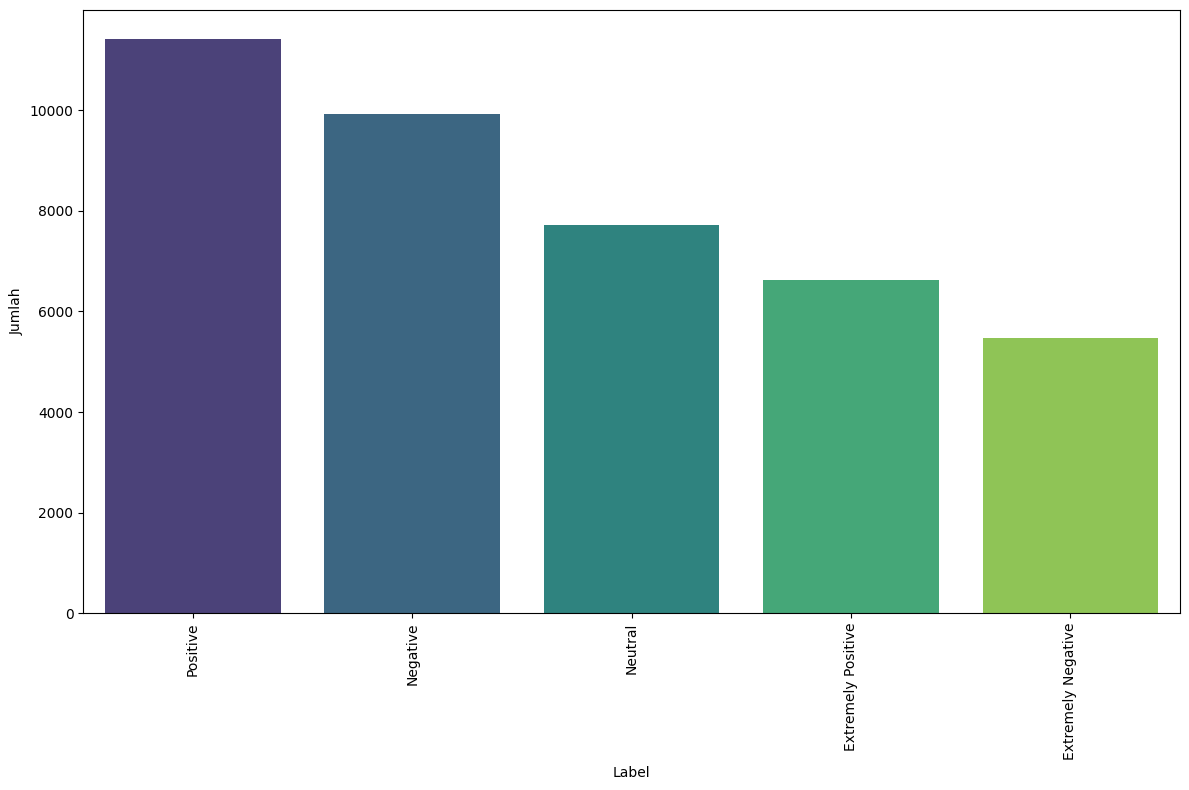

In [ ]:
label_counts = df_train['Sentiment'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1571292598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


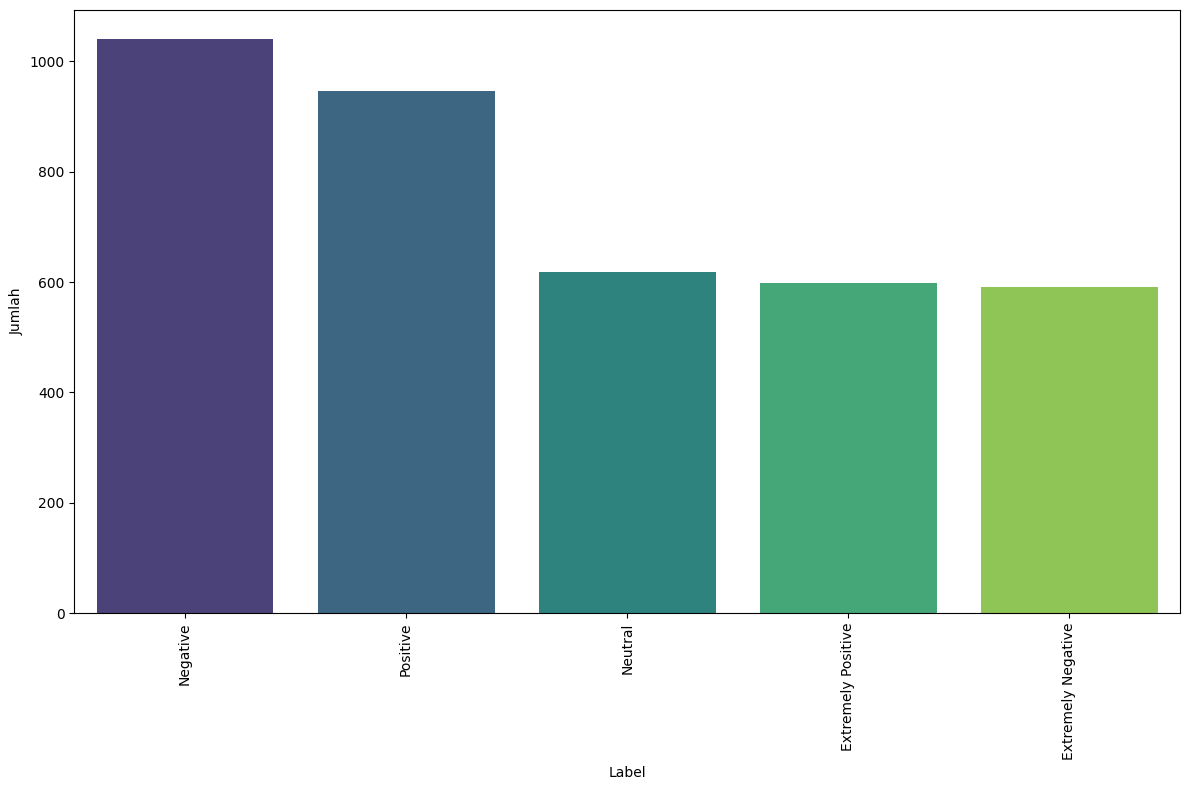

In [ ]:
label_counts = df_test['Sentiment'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Text Preprocessing

In [ ]:
import re
import string

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
def casefoldingText(text):
    text = text.lower()
    return text

In [ ]:
from nltk.tokenize import sent_tokenize

def tokenizingText(text):
    text = sent_tokenize(text)
    return text

In [ ]:
def lemmitizingText(text):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

In [ ]:
df_train['cleaningText'] = df_train['OriginalTweet'].apply(cleaningText)
df_train['text_casefoldingText'] = df_train['cleaningText'].apply(casefoldingText)
df_train['text_processed'] = df_train['text_casefoldingText'].apply(remove_stopwords)
df_train['text_tokenizing'] = df_train['text_processed'].apply(tokenizingText)
df_train['text_lemmitizing'] = df_train['text_tokenizing'].apply(lemmitizingText)

#### Training

In [ ]:
df_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaningText,text_casefoldingText,text_processed,text_tokenizing,text_lemmitizing
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan and and,gahan and and,gahan,[gahan],[gahan]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...,[advice talk neighbours family exchange phone ...,[advice talk neighbours family exchange phone ...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...,[coronavirus australia woolworths give elderly...,[coronavirus australia woolworths give elderly...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...,food stock one empty please dont panic enough ...,[food stock one empty please dont panic enough...,[food stock one empty please dont panic enough...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the outb...,me ready to go at supermarket during the outb...,ready go supermarket outbreak im paranoid food...,[ready go supermarket outbreak im paranoid foo...,[ready go supermarket outbreak im paranoid foo...
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,airline pilots offering to stock supermarket s...,airline pilots offering stock supermarket shel...,[airline pilots offering stock supermarket she...,[airline pilots offering stock supermarket she...
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,response to complaint not provided citing covi...,response complaint provided citing covid relat...,[response complaint provided citing covid rela...,[response complaint provided citing covid rela...
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when is rationin...,you know itâs getting tough when is rationin...,know itâs getting tough rationing toilet paper...,[know itâs getting tough rationing toilet pape...,[know itâs getting tough rationing toilet pape...
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,is it wrong that the smell of hand sanitizer i...,wrong smell hand sanitizer starting turn,[wrong smell hand sanitizer starting turn],[wrong smell hand sanitizer starting turn]


In [ ]:
df_train_cleaned = df_train.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'cleaningText', 'text_casefoldingText', 'text_processed', 'text_tokenizing'], axis=1)
df_train_cleaned.head()

,OriginalTweet,Sentiment,text_lemmitizing
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[gahan]
1,advice Talk to your neighbours family to excha...,Positive,[advice talk neighbours family exchange phone ...
2,Coronavirus Australia: Woolworths to give elde...,Positive,[coronavirus australia woolworths give elderly...
3,My food stock is not the only one which is emp...,Positive,[food stock one empty please dont panic enough...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,[ready go supermarket outbreak im paranoid foo...


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train_cleaned['Sentiment_Encoded'] = label_encoder.fit_transform(df_train_cleaned['Sentiment'])
df_train_cleaned.head()

,OriginalTweet,Sentiment,text_lemmitizing,Sentiment_Encoded
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[gahan],3
1,advice Talk to your neighbours family to excha...,Positive,[advice talk neighbours family exchange phone ...,4
2,Coronavirus Australia: Woolworths to give elde...,Positive,[coronavirus australia woolworths give elderly...,4
3,My food stock is not the only one which is emp...,Positive,[food stock one empty please dont panic enough...,4
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,[ready go supermarket outbreak im paranoid foo...,0


- 0: Extremely Negative
- 1: Extremely Positive
- 2: Negative
- 3: Neutral
- 4: Positive

In [ ]:
df_train_cleaned = df_train_cleaned.drop('Sentiment', axis=1)
df_train_cleaned.head()

,OriginalTweet,text_lemmitizing,Sentiment_Encoded
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,[gahan],3
1,advice Talk to your neighbours family to excha...,[advice talk neighbours family exchange phone ...,4
2,Coronavirus Australia: Woolworths to give elde...,[coronavirus australia woolworths give elderly...,4
3,My food stock is not the only one which is emp...,[food stock one empty please dont panic enough...,4
4,"Me, ready to go at supermarket during the #COV...",[ready go supermarket outbreak im paranoid foo...,0


#### Testing

In [ ]:
df_test['cleaningText'] = df_test['OriginalTweet'].apply(cleaningText)
df_test['text_casefoldingText'] = df_test['cleaningText'].apply(casefoldingText)
df_test['text_processed'] = df_test['text_casefoldingText'].apply(remove_stopwords)
df_test['text_tokenizing'] = df_test['text_processed'].apply(tokenizingText)
df_test['text_lemmitizing'] = df_test['text_tokenizing'].apply(lemmitizingText)

In [ ]:
df_test_cleaned = df_test.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'cleaningText', 'text_casefoldingText', 'text_processed', 'text_tokenizing'], axis=1)
df_test_cleaned.head()

,OriginalTweet,Sentiment,text_lemmitizing
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,[trending new yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,[couldnt find hand sanitizer fred meyer turned...
2,Find out how you can protect yourself and love...,Extremely Positive,[find protect loved ones]
3,#Panic buying hits #NewYork City as anxious sh...,Negative,[buying hits city anxious shoppers stock fooda...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,[one week everyone buying baby milk powder nex...


In [ ]:
df_test_cleaned['Sentiment_Encoded'] = label_encoder.transform(df_test_cleaned['Sentiment'])
df_test_cleaned.head()

,OriginalTweet,Sentiment,text_lemmitizing,Sentiment_Encoded
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,[trending new yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,[couldnt find hand sanitizer fred meyer turned...,4
2,Find out how you can protect yourself and love...,Extremely Positive,[find protect loved ones],1
3,#Panic buying hits #NewYork City as anxious sh...,Negative,[buying hits city anxious shoppers stock fooda...,2
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,[one week everyone buying baby milk powder nex...,3


In [ ]:
df_test_cleaned = df_test_cleaned.drop('Sentiment', axis=1)
df_test_cleaned.head()

,OriginalTweet,text_lemmitizing,Sentiment_Encoded
0,TRENDING: New Yorkers encounter empty supermar...,[trending new yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,[couldnt find hand sanitizer fred meyer turned...,4
2,Find out how you can protect yourself and love...,[find protect loved ones],1
3,#Panic buying hits #NewYork City as anxious sh...,[buying hits city anxious shoppers stock fooda...,2
4,#toiletpaper #dunnypaper #coronavirus #coronav...,[one week everyone buying baby milk powder nex...,3


### Modelling

#### Random Forest TF-IDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df_train_cleaned['text_lemmitizing'].apply(lambda x: ' '.join(x)) # Join the list of words into a string
y = df_train_cleaned['Sentiment_Encoded']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aa,aaa,aaaaas,aaaand,aaannnddd,aabutan,aahh,aajeevika,aalto,aampe,...,ã³ãaferã,ã¼berweist,ã¼cretsiz,ã¼ler,ã¼retime,ã¼rselen,ã¼rstjokeimdaswelt,ã¼s,ã¼sã¼,ãão
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji (90% digunakan untuk training, 10% digunakan untuk validasi)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4946
           1       1.00      1.00      1.00      5953
           2       1.00      1.00      1.00      8930
           3       1.00      1.00      1.00      6930
           4       1.00      1.00      1.00     10282

    accuracy                           1.00     37041
   macro avg       1.00      1.00      1.00     37041
weighted avg       1.00      1.00      1.00     37041



In [ ]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52       535
           1       0.68      0.39      0.49       671
           2       0.52      0.51      0.52       987
           3       0.61      0.76      0.68       783
           4       0.50      0.65      0.56      1140

    accuracy                           0.56      4116
   macro avg       0.60      0.54      0.55      4116
weighted avg       0.58      0.56      0.56      4116



In [ ]:
# Transform test data
X_test_tfidf = tfidf.transform(df_test_cleaned['text_lemmitizing'].apply(lambda x: ' '.join(x)))

In [ ]:
y_pred_test_rf = random_forest.predict(X_test_tfidf.toarray())

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_test_cleaned['Sentiment_Encoded'], y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.59      0.30      0.40       592
           1       0.67      0.39      0.49       599
           2       0.46      0.45      0.45      1041
           3       0.55      0.73      0.62       619
           4       0.44      0.61      0.51       947

    accuracy                           0.50      3798
   macro avg       0.54      0.49      0.50      3798
weighted avg       0.52      0.50      0.49      3798



#### Logistic Regression TF-IDF

In [ ]:
# Bagi data menjadi data latih dan data uji (90% digunakan untuk training, 10% digunakan untuk validasi)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      4946
           1       0.86      0.72      0.79      5953
           2       0.75      0.78      0.77      8930
           3       0.82      0.86      0.84      6930
           4       0.74      0.84      0.79     10282

    accuracy                           0.79     37041
   macro avg       0.81      0.78      0.79     37041
weighted avg       0.79      0.79      0.79     37041



In [ ]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57       535
           1       0.73      0.55      0.63       671
           2       0.53      0.55      0.54       987
           3       0.64      0.71      0.67       783
           4       0.55      0.66      0.60      1140

    accuracy                           0.60      4116
   macro avg       0.63      0.59      0.60      4116
weighted avg       0.61      0.60      0.60      4116



In [ ]:
# Transform the test data using the fitted TF-IDF vectorizer
X_test_tfidf = tfidf.transform(df_test_cleaned['text_lemmitizing'].apply(lambda x: ' '.join(x)))

# Make predictions on the test data
y_pred_test_lr = logistic_regression.predict(X_test_tfidf.toarray())

print(classification_report(df_test_cleaned['Sentiment_Encoded'], y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51       592
           1       0.69      0.50      0.58       599
           2       0.50      0.51      0.50      1041
           3       0.61      0.67      0.64       619
           4       0.48      0.62      0.54       947

    accuracy                           0.55      3798
   macro avg       0.58      0.55      0.56      3798
weighted avg       0.56      0.55      0.55      3798



### Notes
1. Trying out different tokenizations, as that may cause differing results in the classification scores
2. TF-IDF parameters, too little = not enough info, no restrictions = overfitting